In [ ]:
import pandas as pd
import numpy as np
import csv

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.text import Tokenizer

from keras.models import Sequential
from keras.layers import Input, Dense, Dropout

from matplotlib import pyplot as plt


from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Input
from keras.utils import to_categorical

import matplotlib.pyplot as plt

In [ ]:

data_train = pd.read_csv("train.csv", sep=';')
data_train.head()

,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [ ]:
data_train

,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0
...,...,...,...,...
24348,24348,Mexico Senate committee OK's air transport dea...,MEXICO CITY (Reuters) - A key committee in Mex...,1
24349,24349,BREAKING: HILLARY CLINTON’S STATE DEPARTMENT G...,IF SHE S NOT TOAST NOW THEN WE RE IN BIGGER TR...,0
24350,24350,trump breaks from stump speech to admire beaut...,kremlin nato was created for agression \nruss...,0
24351,24351,NFL PLAYER Delivers Courageous Message: Stop B...,Dallas Cowboys star wide receiver Dez Bryant t...,0


In [ ]:
data_test = pd.read_csv("test.csv", sep=';')
data_test.head()

,Unnamed: 0,title,text,label
0,0,"Live from New York, it's a Trump-Clinton remat...",NEW YORK (Reuters) - Veteran actor and frequen...,1
1,1,Catalan separatists to lose majority in tight ...,BARCELONA (Reuters) - Catalonia s independence...,1
2,2,North Carolina governor concedes election to D...,"WINSTON-SALEM, N.C. (Reuters) - North Carolina...",1
3,3,Draft Senate Iran legislation sets tough new U...,WASHINGTON (Reuters) - Draft legislation respo...,1
4,4,California governor taps U.S. Representative B...,"SACRAMENTO, Calif. (Reuters) - California Gove...",1


In [ ]:
data_train['content'] = data_train['title'] + data_train['text']
data_test['content'] = data_test['title'] + data_test['text']

In [ ]:
data_train.head()

,Unnamed: 0,title,text,label,content
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1,Palestinians switch off Christmas lights in Be...
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1,China says Trump call with Taiwan president wo...
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0,FAIL! The Trump Organization’s Credit Score W...
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1,Zimbabwe military chief's China trip was norma...
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...


In [ ]:
data_train = data_train.drop(columns=['Unnamed: 0', 'title', 'text'])
data_train.head()

,label,content
0,1,Palestinians switch off Christmas lights in Be...
1,1,China says Trump call with Taiwan president wo...
2,0,FAIL! The Trump Organization’s Credit Score W...
3,1,Zimbabwe military chief's China trip was norma...
4,0,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...


In [ ]:
data_test = data_test.drop(columns=['Unnamed: 0', 'title', 'text'])
data_test.head()

,label,content
0,1,"Live from New York, it's a Trump-Clinton remat..."
1,1,Catalan separatists to lose majority in tight ...
2,1,North Carolina governor concedes election to D...
3,1,Draft Senate Iran legislation sets tough new U...
4,1,California governor taps U.S. Representative B...


In [ ]:
SAMPLE = True

In [ ]:
if SAMPLE:
  data_train = data_train.sample(1000)

In [ ]:
SAMPLE

True

In [ ]:
# Inicializace tokenizátoru -> u tokenizátoru probíhá k základním úpravám (normalizace), jako všechno malým, filtry atd.
tokenizer = Tokenizer(num_words=5000)
# nafitovat na našich datech -> vytvoříme tokeny
tokenizer.fit_on_texts(data_train["content"])

In [ ]:
# převod textů na sekvence (zakódování)
X = tokenizer.texts_to_sequences(data_train["content"])

In [ ]:
# příklad jak se zakóduje text do sekvence
data_train["content"].iloc[1]

' Merriam-Webster Dictionary SHAMES Trump On Twitter After Misspelling TweetsDonald Trump is a narcissist and a bully. Despite his ever-increasing obnoxiousness and commitment to Nazi-like policy proposals, he continues to rise in the polls. However, everyone sane is sick of it   including the Merriam-Webster Dictionary. Whomever runs that account on Twitter decided to take a shot a Trump and his misspelled tweets, by tweeting out definitions and corrections to billionaire reality star turned joke of a Presidential candidate. The prompt for this seems to be one of Trump s crazy Twitter rants, the latest of which he posted Friday.Trump s tweets featured common, easy to spell words that were horrifically misspelled. Those words included  honor,   choker,  and  lightweight.  Here is the dictionary s tweet mocking and correcting Trump:honer: one that hones (https://t.co/76PlKG8PA6)leightweight: We have no. idea. chocker: https://t.co/geeDMqiS4D https://t.co/2km86hZAVQ  Merriam-Webster (@Me

In [ ]:
# první slovo - index 535, druhé slovo index 936
pd.DataFrame(X).iloc[1]

,1
0,4768.0
1,4769.0
2,13.0
3,9.0
4,151.0
...,...
4276,NaN
4277,NaN
4278,NaN
4279,NaN


In [ ]:
# pod indexe 535 najdeme 'advice', pod indexem 936 najdeme 'talk'
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 's': 8,
 'on': 9,
 'for': 10,
 'is': 11,
 'said': 12,
 'trump': 13,
 'he': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'by': 19,
 'his': 20,
 'has': 21,
 'be': 22,
 'from': 23,
 'have': 24,
 'not': 25,
 'this': 26,
 'are': 27,
 'at': 28,
 'they': 29,
 'who': 30,
 'an': 31,
 'but': 32,
 'u': 33,
 'i': 34,
 'would': 35,
 'we': 36,
 'about': 37,
 'president': 38,
 'you': 39,
 'will': 40,
 'their': 41,
 't': 42,
 '”': 43,
 'had': 44,
 'or': 45,
 'more': 46,
 'people': 47,
 'if': 48,
 'one': 49,
 'been': 50,
 'were': 51,
 'after': 52,
 'which': 53,
 'her': 54,
 'out': 55,
 'all': 56,
 'what': 57,
 'she': 58,
 'when': 59,
 'also': 60,
 'state': 61,
 'clinton': 62,
 'no': 63,
 'up': 64,
 'reuters': 65,
 'house': 66,
 'its': 67,
 'government': 68,
 'new': 69,
 'over': 70,
 'there': 71,
 'so': 72,
 'donald': 73,
 'him': 74,
 'just': 75,
 'white': 76,
 'could': 77,
 'our': 78,
 'states': 79,
 'them': 80,
 'than': 8

Text(0, 0.5, 'Počet textů')

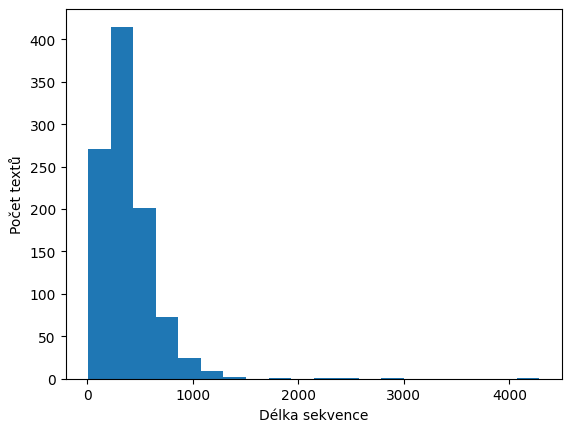

In [ ]:
# Získání délek sekvencí
lengths = [len(seq) for seq in X]

# Histogram délek sekvencí
plt.hist(lengths, bins=20)
plt.xlabel('Délka sekvence')
plt.ylabel('Počet textů')

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,4271,4272,4273,4274,4275,4276,4277,4278,4279,4280
0,66,138,9,354,651,16,1829,692,19.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4768,4769,13,9,151,52,13,11,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,234,49,537,372,1,3855,6,3031,1.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4397,361,3220,10,2294,32,4,985,4398.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3038,148,140,1954,4099,4100,9,242,1.0,205.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,26,49,1566,64,144,2929,3,1415,181.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,3754,13,320,2716,323,1177,9,270,65.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,33,8,326,1003,920,1024,668,10,3847.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,117,403,2,13,1171,560,104,3643,125.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# když bych měl dlouhé texty tak zaříznu pomocí max_len
# do neuronky, musíme pořád dávat stejně velká data na vstupu
# trochu zmenšíme data na vstupu, podle histogramu to není moho řádků, kde texty jsou delší než 55 tokenů
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
y = data_train["label"]
y.value_counts()

,count
label,
1,521
0,479


In [ ]:
y = to_categorical(y)
y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [ ]:
# Rozdělení dat na trénovací a testovací sadu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Vytvoření modelu - SOFTMAX
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=120, input_length=120))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

# Kompilace modelu
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, maxlen))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 1000, 120)           │         600,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_1                  │ (None, 1000, 120)           │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          88,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 688,602 (2.63 MB)

 Trainable params: 688,602 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Trénování modelu
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6545 - loss: 0.6809 - val_accuracy: 0.8550 - val_loss: 0.6231
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8429 - loss: 0.5639 - val_accuracy: 0.8200 - val_loss: 0.4421
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8909 - loss: 0.3550 - val_accuracy: 0.9150 - val_loss: 0.2426
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9526 - loss: 0.1540 - val_accuracy: 0.9100 - val_loss: 0.2185
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9707 - loss: 0.0804 - val_accuracy: 0.9100 - val_loss: 0.2150
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9881 - loss: 0.0449 - val_accuracy: 0.9350 - val_loss: 0.1838
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9953 - loss: 0.0337 - val_accuracy: 0.9100 - val_loss: 0.2109
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 1.0000 - loss: 0.0222 - val_accuracy: 0.9300 - val_loss: 0.2068
Epoch 9/

In [ ]:
def plot_history(history):
    # plot the Loss curve(s)
    plt.figure(figsize=[8,6])

    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)

    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    plt.show()

    # plot the Accuracy curve(s)
    plt.figure(figsize=[8,6])

    plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
    plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)

    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

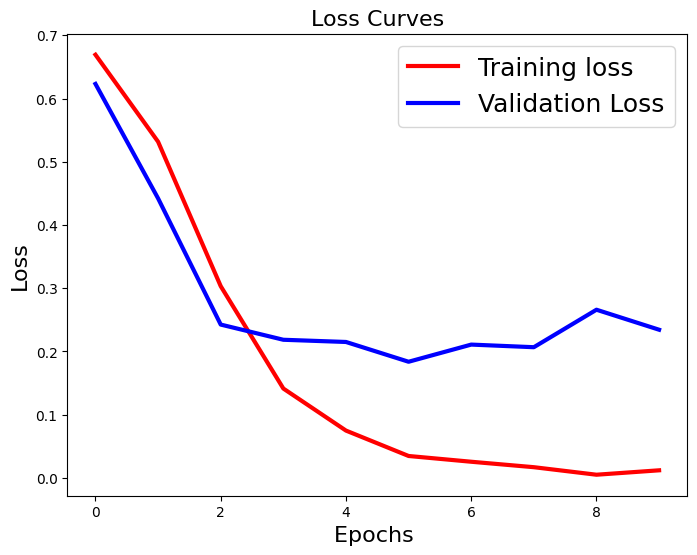

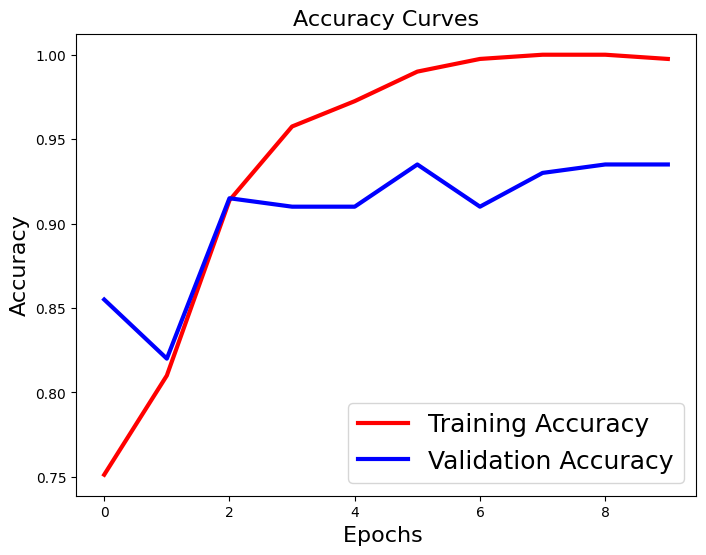

In [ ]:
plot_history(history)

In [ ]:
# natrénované je to fajn, presnosť začína na 88%, ale potom sa nám to rýchlo rozchádza, vysoký overfitting, pretrénovanost modelu
# aby sme tomu zabánili použijeme: earlystopping

In [ ]:
# EarlyStopping
from keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.001,
    patience=5)

In [ ]:
history = model.fit(x=X_train,
             y=y_train,
             batch_size=36,
             epochs=10,
             verbose='auto',
             validation_data=(X_test, y_test),
             callbacks=[early_stopping])

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 0.9300 - val_loss: 0.2531
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9400 - val_loss: 0.2679
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9350 - val_loss: 0.2666
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9350 - val_loss: 0.2976
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 1.0000 - loss: 7.4104e-04 - val_accuracy: 0.9350 - val_loss: 0.2747
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 92s 4s/step - accuracy: 0.9988 - loss: 0.0079 - val_accuracy: 0.9000 - val_loss: 0.3066
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.9350 - val_loss: 0.3081


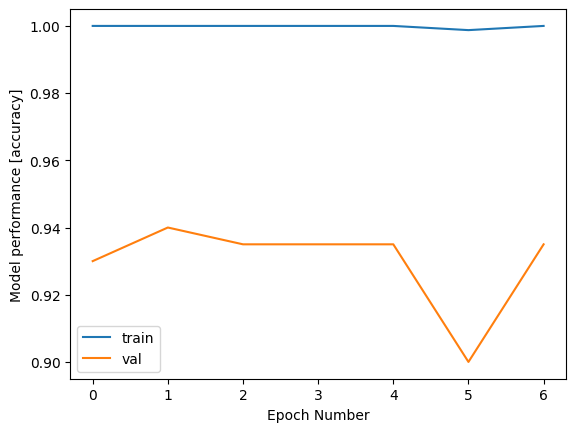

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.xlabel('Epoch Number')
plt.ylabel("Model performance [accuracy]")
plt.legend()
plt.show()

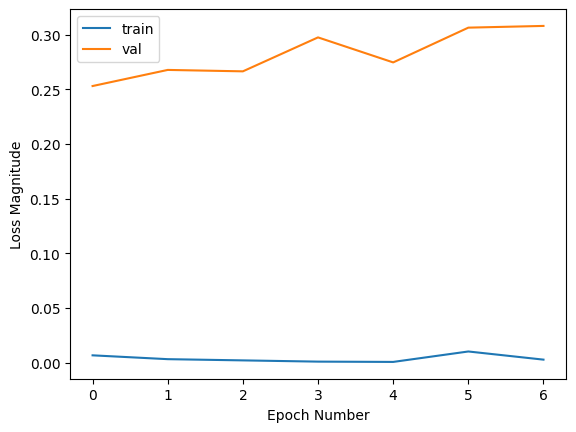

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve

In [ ]:
y_pred = model.predict(X_test)
y_pred_treshold = pd.DataFrame(y_pred)[0].apply(lambda x: 1 if x>=0.5 else 0)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 580ms/step


In [ ]:
# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype(int)


# OPÝTAT SA! ZBAVILI SME SA TRESHOLDU V y_pred_treshold

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        96
           1       0.92      0.96      0.94       104

   micro avg       0.94      0.94      0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200
 samples avg       0.94      0.94      0.94       200



In [ ]:
y_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

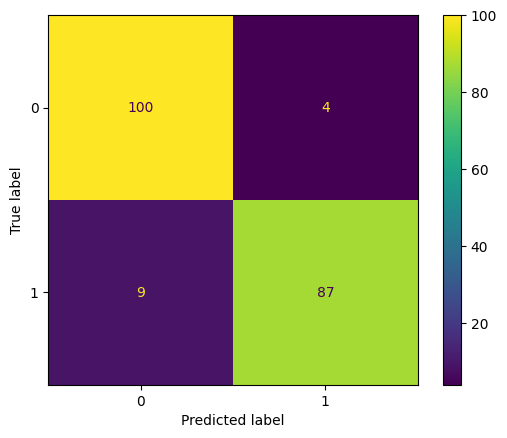

In [ ]:
cm = confusion_matrix(y_test[:, 0], y_pred[:, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test[:, 0], y_pred[:, 0])

In [ ]:
help_prob = [0 for _ in range(len(y_test[:, 0]))]
help_fpr, help_tpr, _ = roc_curve(y_test[:, 0], help_prob)

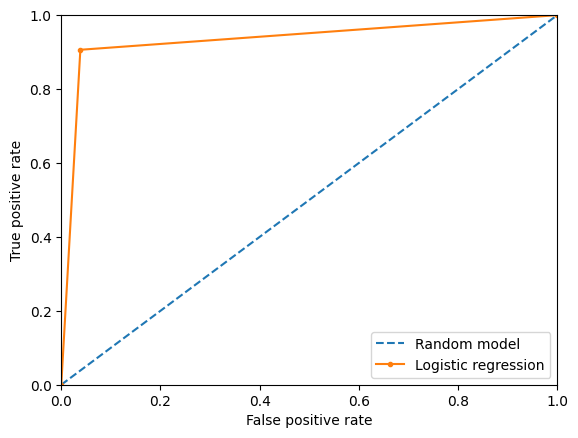

In [ ]:
plt.plot(help_fpr, help_tpr, linestyle='--', label='Random model')
plt.plot(fpr, tpr, marker='.', label='Logistic regression')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

Sigmoid

In [ ]:
# Vytvoření modelu
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=120, input_length=120))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='sigmoid', name="output_sigmoid"))

# Kompilace modelu
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, maxlen))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 1000, 120)           │         600,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_2                  │ (None, 1000, 120)           │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100)                 │          88,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_sigmoid (Dense)               │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 688,602 (2.63 MB)

 Trainable params: 688,602 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Trénování modelu
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6645 - loss: 0.6794 - val_accuracy: 0.8200 - val_loss: 0.6180
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8251 - loss: 0.5628 - val_accuracy: 0.8150 - val_loss: 0.4259
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8842 - loss: 0.3396 - val_accuracy: 0.9100 - val_loss: 0.2298
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9513 - loss: 0.1604 - val_accuracy: 0.8900 - val_loss: 0.2261
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9847 - loss: 0.0778 - val_accuracy: 0.9100 - val_loss: 0.2167
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9932 - loss: 0.0467 - val_accuracy: 0.9450 - val_loss: 0.1791
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9951 - loss: 0.0154 - val_accuracy: 0.9450 - val_loss: 0.1809
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 0.9050 - val_loss: 0.2167
Epoch 9/

In [ ]:
def plot_history(history):
    # plot the Loss curve(s)
    plt.figure(figsize=[8,6])

    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)

    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    plt.show()

    # plot the Accuracy curve(s)
    plt.figure(figsize=[8,6])

    plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
    plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)

    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

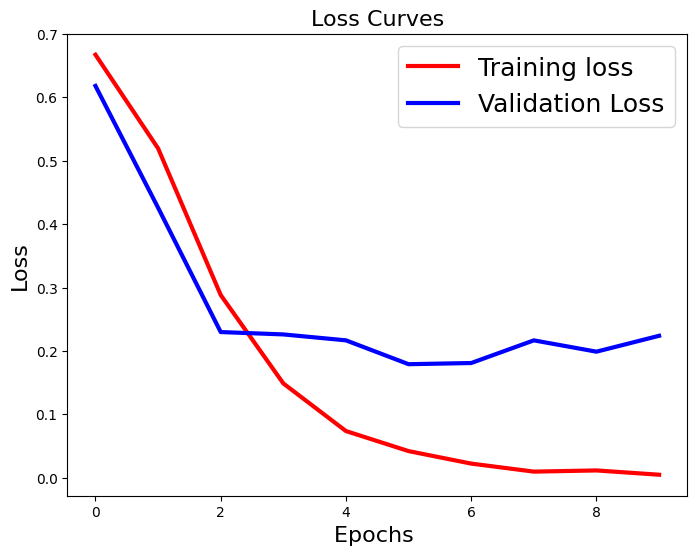

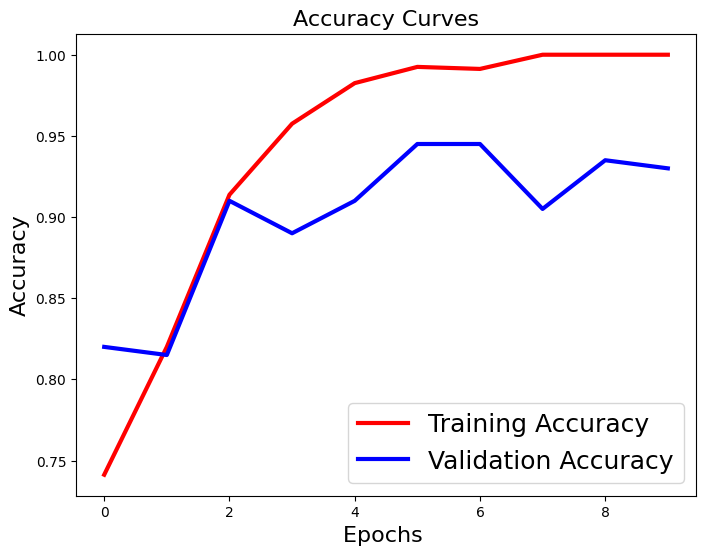

In [ ]:
plot_history(history)

In [ ]:
# EarlyStopping
from keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.001,
    patience=5)

In [ ]:
history = model.fit(x=X_train,
             y=y_train,
             batch_size=36,
             epochs=80,
             verbose='auto',
             validation_data=(X_test, y_test),
             callbacks=[early_stopping])

Epoch 1/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.9250 - val_loss: 0.2366
Epoch 2/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9400 - val_loss: 0.2383
Epoch 3/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9100 - val_loss: 0.2777
Epoch 4/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9200 - val_loss: 0.2727
Epoch 5/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9250 - val_loss: 0.2850
Epoch 6/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 1.0000 - loss: 9.8711e-04 - val_accuracy: 0.9350 - val_loss: 0.2772
Epoch 7/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 1.0000 - loss: 6.3195e-04 - val_accuracy: 0.9400 - val_loss: 0.2786


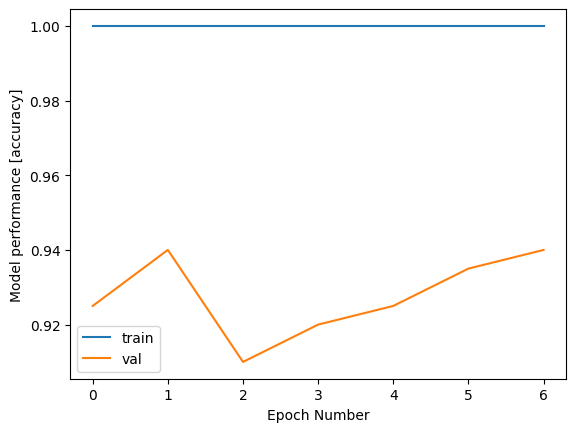

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.xlabel('Epoch Number')
plt.ylabel("Model performance [accuracy]")
plt.legend()
plt.show()

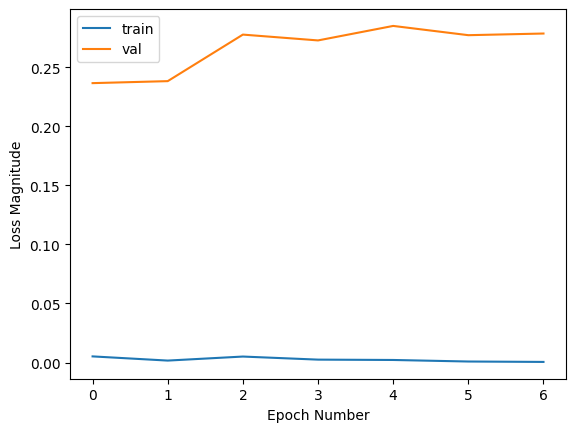

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.legend()
plt.show()

LSTM - skúšanie rôznych parametrov

In [ ]:
# Vytvoření modelu
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=1000))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

# Kompilace modelu
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, maxlen))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 1000, 128)           │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_3                  │ (None, 1000, 128)           │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100)                 │          91,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 731,802 (2.79 MB)

 Trainable params: 731,802 (2.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.layers import Bidirectional

In [ ]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=maxlen),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

In [ ]:
# Kompilace modelu
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, maxlen))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 1000, 128)           │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 1000, 128)           │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 784,322 (2.99 MB)

 Trainable params: 784,322 (2.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# EarlyStopping rozšírený o viac parametrov (inšpirované od M.)
early = EarlyStopping(monitor='val_accuracy',
    min_delta=0.005,
    patience=3,
    mode='auto',
    restore_best_weights=True,
    start_from_epoch=0
)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early])

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.5730 - loss: 0.6850 - val_accuracy: 0.8200 - val_loss: 0.5155
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.9057 - loss: 0.2777 - val_accuracy: 0.9250 - val_loss: 0.2287
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.9837 - loss: 0.0544 - val_accuracy: 0.8900 - val_loss: 0.3062
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.9903 - loss: 0.0336 - val_accuracy: 0.9150 - val_loss: 0.3678
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.9985 - loss: 0.0091 - val_accuracy: 0.8700 - val_loss: 0.4956


In [ ]:
def plot_history(history):
    # plot the Loss curve(s)
    plt.figure(figsize=[8,6])

    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)

    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    plt.show()

    # plot the Accuracy curve(s)
    plt.figure(figsize=[8,6])

    plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
    plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)

    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

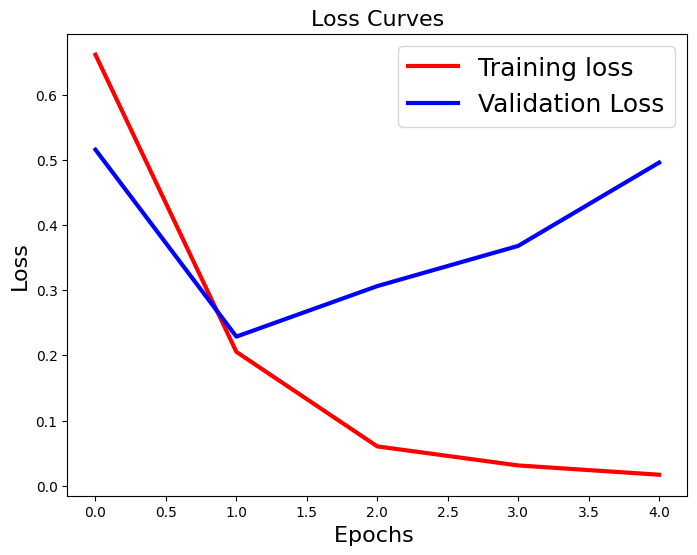

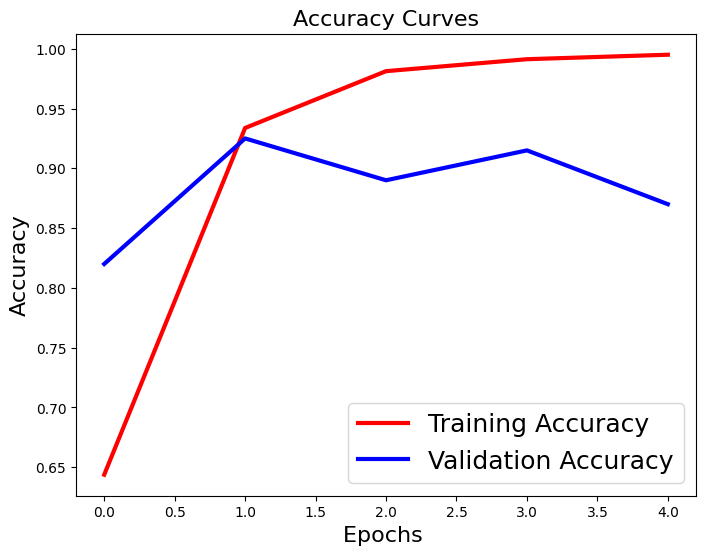

In [ ]:
plot_history(history)

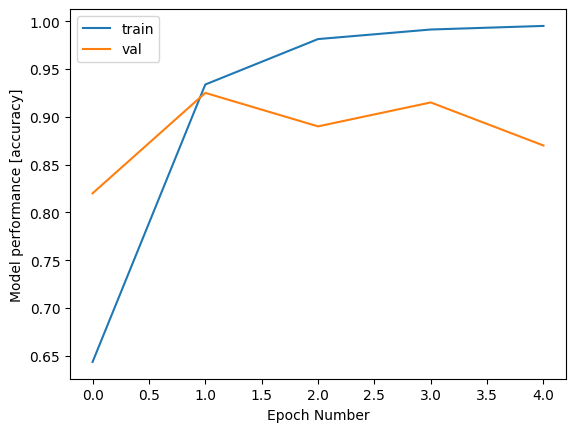

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.xlabel('Epoch Number')
plt.ylabel("Model performance [accuracy]")
plt.legend()
plt.show()

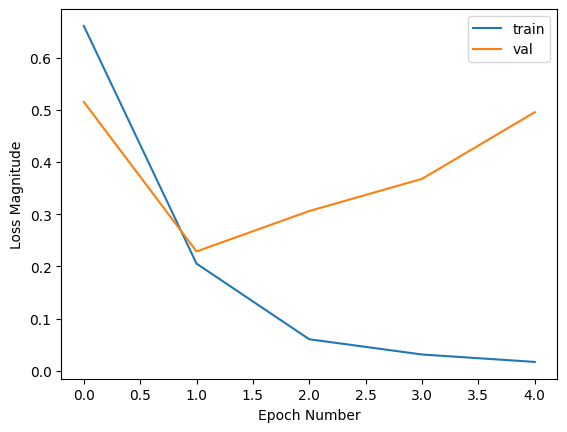

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.legend()
plt.show()